# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.okay

My dataset:https://www.kaggle.com/datasets/tysonpo/ice-cream-dataset?resource=download

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [5]:
import pandas as pd
import sqlite3 as sl
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style

df_reviews=pd.read_csv('reviews.csv')
df=pd.read_csv('products.csv')
df


,brand,key,name,subhead,description,rating,rating_count,ingredients
0,bj,0_bj,Salted Caramel Core,Sweet Cream Ice Cream with Blonde Brownies & a...,Find your way to the ultimate ice cream experi...,3.7,208,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
1,bj,1_bj,Netflix & Chilll'd™,Peanut Butter Ice Cream with Sweet & Salty Pre...,There’s something for everyone to watch on Net...,4.0,127,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
2,bj,2_bj,Chip Happens,A Cold Mess of Chocolate Ice Cream with Fudge ...,Sometimes “chip” happens and everything’s a me...,4.7,130,"CREAM, LIQUID SUGAR (SUGAR, WATER), SKIM MILK,..."
3,bj,3_bj,Cannoli,Mascarpone Ice Cream with Fudge-Covered Pastry...,As a Limited Batch that captured the rapture o...,3.6,70,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
4,bj,4_bj,Gimme S’more!™,Toasted Marshmallow Ice Cream with Chocolate C...,It’s a gimme: there’s always room for s’more. ...,4.5,281,"CREAM, SKIM MILK, WATER, LIQUID SUGAR (SUGAR, ..."
...,...,...,...,...,...,...,...,...
236,breyers,64_breyers,CINNABON®,NaN,Calling all cinnamon roll lovers! We teamed up...,4.0,28,"MILK, CORN SYRUP, SUGAR, BROWN SUGAR, SOYBEAN ..."
237,breyers,65_breyers,CarbSmart™ Caramel Swirl Bar,NaN,Watching your grams of sugar or carbs? Try our...,4.7,18,"MILK, WATER, CARAMEL SWIRL, SUGAR, WATER, CORN..."
238,breyers,66_breyers,Layered Dessert S'mores,NaN,Calling all S'mores lovers! Make sure you don'...,2.5,31,"MILK, CORN SYRUP, SUGAR, WHEAT FLOUR, BUTTER, ..."
239,breyers,67_breyers,Layered Dessert Peach Cobbler,NaN,Love peach cobbler topped with Breyers®? Then ...,3.2,38,"MILK, CORN SYRUP, ENRICHED WHEAT FLOUR, WHEAT ..."


## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [41]:
df.info()  #checking the deatils like null,data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         241 non-null    object 
 1   key           241 non-null    object 
 2   name          241 non-null    object 
 3   description   237 non-null    object 
 4   rating        241 non-null    float64
 5   rating_count  241 non-null    int64  
 6   ingredients   241 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 13.3+ KB


In [60]:
#Finding missing values
total_cells = np.product(df.shape)

missing_cells = pd.isnull(df).sum()

total_missing = missing_cells.sum()

percentage_missing = round((total_missing/total_cells), 2) *100

print(percentage_missing, "% Missing cells from the data") 

10.0 % Missing cells from the data


In [61]:
#to find the missing percentages
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100,2)))

brand - 0.0%
key - 0.0%
name - 0.0%
subhead - 76.35%
description - 1.66%
rating - 0.0%
rating_count - 0.0%
ingredients - 0.0%


In [60]:
#finding highest rating icecream
ex_rating=df.sort_values('rating',ascending=0).head(10)
ex_rating

,brand,key,name,subhead,description,rating,rating_count,ingredients
120,hd,63_hd,Vanilla Caramel White Chocolate TRIO CRISPY LA...,NaN,This incredible combination of tastes and text...,5.0,32,"CREAM, SKIM MILK, SUGAR, SWEETENED CONDENSED M..."
7,bj,7_bj,Chocolate Peanut Butter Split,Chocolate & Banana Ice Creams with Mini Peanut...,We’ve loaded our banana and chocolate ice crea...,5.0,7,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
213,breyers,41_breyers,OREO® Snack Cups 10ct,NaN,Breyers® vanilla with real OREO®? Yes please! ...,5.0,2,"SKIM MILK, LIQUID SUGAR, SUGAR, WATER, CREAM, ..."
101,hd,44_hd,Peppermint Bark Ice Cream Bar,NaN,Our peppermint bark ice cream bars start with ...,5.0,8,"WHITE CHOCOLATE ICE CREAM: CREAM, SKIM MILK, S..."
88,hd,31_hd,Honey Salted Caramel Almond Ice Cream,NaN,"This decadent blend of honey ice cream, swirls...",5.0,103,"CREAM, SKIM MILK, SUGAR, SWEETENED CONDENSED M..."
71,hd,14_hd,Chocolate Fudge Non-Dairy Bar,NaN,Enjoy an indulgent non-dairy and vegan bar mad...,5.0,22,"WATER, SUGAR, CORN SYRUP, CHOCOLATE, COCONUT O..."
29,bj,29_bj,Ice Cream Sammie,Vanilla Ice Cream with Chocolate Sandwich Cook...,To capture the great taste of the classic ice ...,5.0,31,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
100,hd,43_hd,Peppermint Bark Ice Cream,NaN,Celebrate the season with our rendition of thi...,5.0,31,"WHITE CHOCOLATE ICE CREAM (CREAM, SKIM MILK, S..."
33,bj,33_bj,New York Super Fudge Chunk®,Chocolate Ice Cream with White & Dark Fudge Ch...,"In 1985, to make a name for ourselves in New Y...",4.9,63,"CREAM, LIQUID SUGAR (SUGAR, WATER), SKIM MILK,..."
235,breyers,63_breyers,Chocolate Snack Cups 10ct,NaN,"Breyers® Chocolate ice cream - rich, creamy, w...",4.9,26,"MILK, CREAM, SUGAR, WATER, DUTCHED COCOA (PROC..."


In [67]:
#Finding the lowest rating ice cream
worst_rating=df.sort_values('rating').head()
worst_rating
#worst rating one is breyers Chocolate Chip Cookie Dough

,brand,key,name,subhead,description,rating,rating_count,ingredients
221,breyers,49_breyers,Chocolate Chip Cookie Dough,NaN,With creamy vanilla and chunks of cookie dough...,1.2,89,"MILK, SUGAR, CORN SYRUP, CREAM, ENRICHED WHEAT..."
50,bj,50_bj,Chocolate Chip Cookie Dough Core,Cookie Milk Ice Cream with Fudge Chips & a Cho...,Our latest cookie dough creation is boldly loa...,1.8,166,"CREAM, SKIM MILK, WATER, LIQUID SUGAR (SUGAR, ..."
223,breyers,51_breyers,Coffee,NaN,Enjoy Breyers® Coffee by the scoop and brew up...,2.4,52,"MILK, CORN SYRUP, SUGAR, CREAM, COFFEE EXTRACT..."
238,breyers,66_breyers,Layered Dessert S'mores,NaN,Calling all S'mores lovers! Make sure you don'...,2.5,31,"MILK, CORN SYRUP, SUGAR, WHEAT FLOUR, BUTTER, ..."
123,hd,66_hd,Vanilla Milk Chocolate Almond Ice Cream Bar,NaN,"We start with pure, sweet vanilla and blend it...",2.5,224,"CREAM, SKIM MILK, SUGAR, EGG YOLKS, MILK CHOCO..."


In [34]:
# want to know the mean rating for each ice cream brand
Brand_Rating = df.groupby('brand')['rating'].mean().to_frame().reset_index()

Brand_Rating

,brand,rating
0,bj,4.331579
1,breyers,3.962319
2,hd,4.307143
3,talenti,4.355556


In [66]:
#worst_rating=df[["name","rating","rating_count"]].sort_values("rating")
#worst_rating
#Chocolate Chip Cookie Dough has worse review

In [6]:
# #sub head is not necessary and 76% is missing so am going to drop that column.
# df=df.drop(['subhead'],axis=1)
# df

## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

<Axes: xlabel='brand', ylabel='rating'>

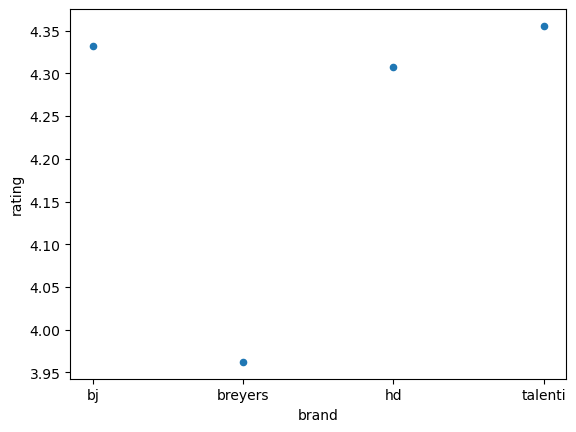

In [75]:
#The rating for the four different brands
    
#plt.bar(Brand_Rating['brand'],Brand_Rating['rating'])
# x=Brand_Rating['brand']
# y=Brand_Rating['rating']
# plt.bar(x,y)
# plt.show()

Brand_Rating.plot.scatter(x='brand',y='rating')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Chocolate Chip Cookie Dough'),
  Text(1, 0, 'Chocolate Chip Cookie Dough Core'),
  Text(2, 0, 'Coffee'),
  Text(3, 0, "Layered Dessert S'mores"),
  Text(4, 0, 'Vanilla Milk Chocolate Almond Ice Cream Bar')])

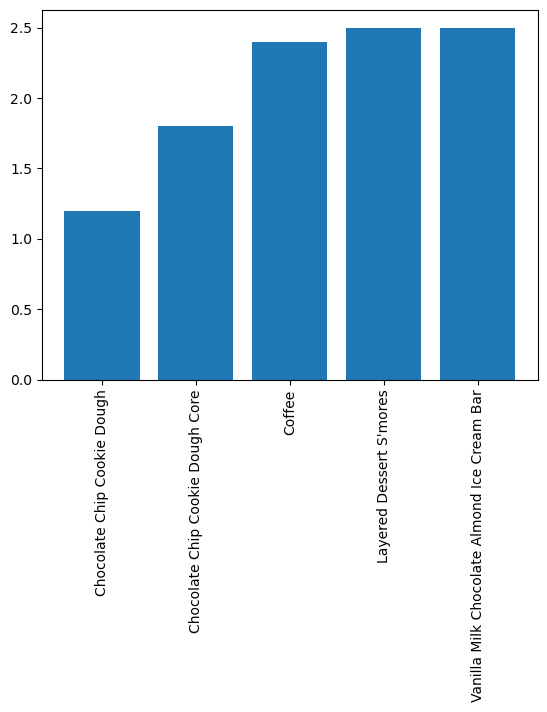

In [88]:
#finding the worst rating icecream
plt.bar(worst_rating['name'],worst_rating['rating'])
plt.xticks(rotation=90)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Vanilla Caramel White Chocolate TRIO CRISPY LAYERS'),
  Text(1, 0, 'Chocolate Peanut Butter Split'),
  Text(2, 0, 'OREO® Snack Cups 10ct'),
  Text(3, 0, 'Peppermint Bark Ice Cream Bar'),
  Text(4, 0, 'Honey Salted Caramel Almond Ice Cream'),
  Text(5, 0, 'Chocolate Fudge Non-Dairy Bar'),
  Text(6, 0, 'Ice Cream Sammie'),
  Text(7, 0, 'Peppermint Bark Ice Cream'),
  Text(8, 0, 'New York Super Fudge Chunk®'),
  Text(9, 0, 'Chocolate Snack Cups 10ct')])

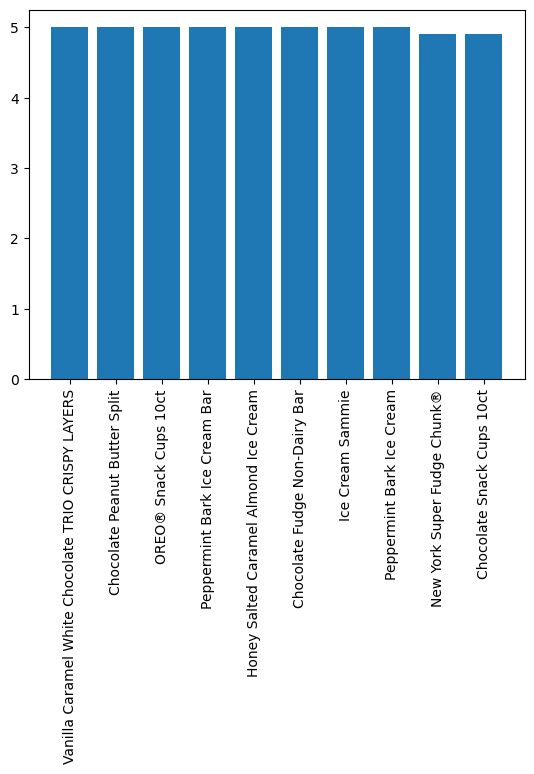

In [99]:
#plotting highest rating ice creams
plt.bar(ex_rating['name'],ex_rating['rating'])
plt.xticks(rotation=90)
#plt.yticks(np.arange(4, 5, step=.05))
#ex_rating.plot.scatter(x='name', y='rating')

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? 
When you check the ingredients for highest rating icecream and lowest rating ice cream,we can see it is almost same( not talking about flavor).That is with the same ingredients we can make the best ice cream and the worst icecream.


2. Do you have any concerns about your dataset? 

The Breyers ice cream rating is lesser than others,but while checking for the excellent rating one,can see one of this brand is there in the top.But the rating count for this is  very less.So I am confused whether should I consider this or not, while finding the most loved ice creams

3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? 

Sub head and description are not needed for my analysis,and it has missing values also,thinking to remove those